In [28]:
import qiskit as qk
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.providers.aer import QasmSimulator
from qiskit import transpile


# We register two QuantumRegisters and one ClassicalRegister
circuit_registers = [QuantumRegister(2, 'input_qubits'), ClassicalRegister(1, 'output_bit')]


def create_initialize_circuit():
    
    circuit = QuantumCircuit(*circuit_registers)
    # We apply an X to the qubit output and an H to all the qubits
    circuit.x(1)
    circuit.h(0)
    circuit.h(1)
    circuit.barrier()
    
    return circuit


def create_balanced_oracle():

    circuit = QuantumCircuit(*circuit_registers)
    # We apply the C-not
    circuit.cx(0,1)
    circuit.barrier()
    
    return circuit


def create_constant_oracle0():

    circuit = QuantumCircuit(*circuit_registers)
    # We do not do anything

    return circuit


def create_constant_oracle1():
    
    circuit = QuantumCircuit(*circuit_registers)
    # We apply the C-not
    circuit.x(1)
    circuit.barrier()
    
    return circuit


def create_measurement_circuit():

    circuit = QuantumCircuit(*circuit_registers)
    # We apply the H to the input bit and we measure it
    circuit.h(0)
    circuit.measure(0, 0)
    
    return circuit


# We create and initialize the circuit
initialization_circuit = create_initialize_circuit()

# We create the oracles
balanced_oracle = create_balanced_oracle()
constant_oracle0 = create_constant_oracle0()
constant_oracle1 = create_constant_oracle1()

# We create the measurement circuit
measurement_circuit = create_measurement_circuit()

# We simulate the quantum circuit
simulator = QasmSimulator()

# For each type of oracle, we run and measure the results
oracles = [('Balanced', balanced_oracle), ('Constant0', constant_oracle0), ('Constant1', constant_oracle1)]
for kind, oracle in oracles:
    final_circuit = initialization_circuit.compose(oracle).compose(measurement_circuit)
    transpiled_circuit = qk.transpile(final_circuit)
    measure_result = simulator.run(transpiled_circuit, shots=10).result().get_counts()
    print(kind, measure_result)




Balanced {'1': 10}
Constant0 {'0': 10}
Constant1 {'0': 10}


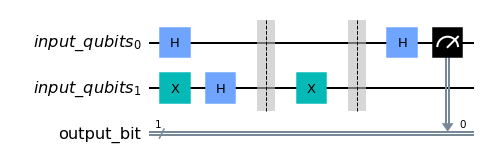

In [29]:
final_circuit.draw(output="mpl")